In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
# np.random.seed(19680801)

#### 2.1 An experiment consists of tossing a fair coin twice. If a head occurs on the first toss,we let xl = 1 and if a tail occurs we let xl = O. The same assignment is used for the outcome X2 of the second toss. Defining the random variable as Y = X1X2, estimate the probabilities for the different possible values of Y. Explain your results.

Answer: Given the values of X, X1X2 is one only when both coins land heads and zero in all other cases (HT, TH, TT)

<IPython.core.display.Javascript object>


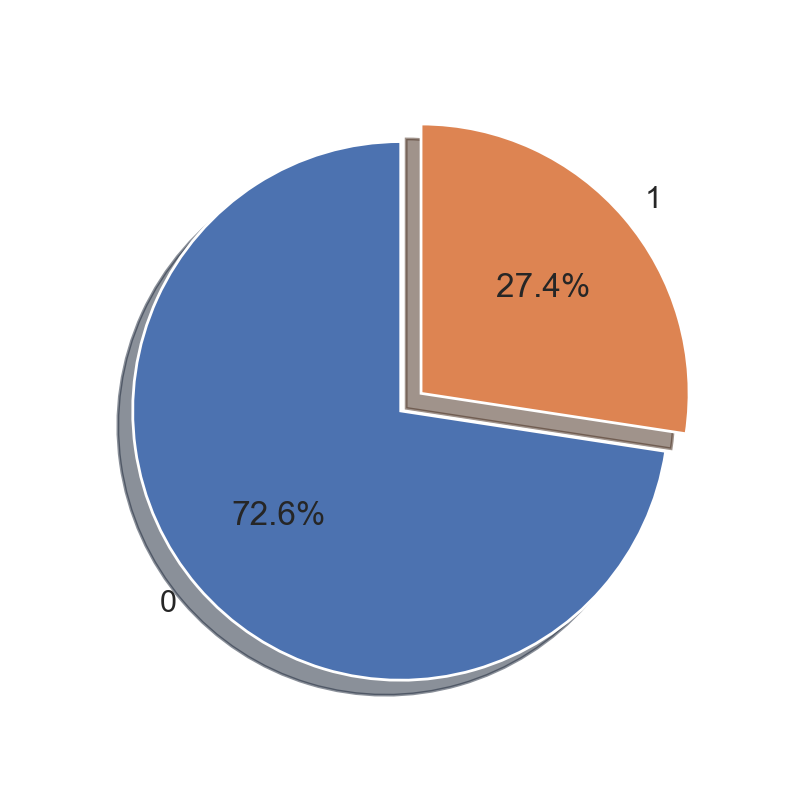

(-1.1220582972219375,
 1.1912745298536398,
 -1.117928966557201,
 1.169141105700149)

In [43]:
def coin_toss(M):
    X = np.random.random_sample((M,))
    return 1*(X>0.5)

M = 1000
X1 = coin_toss(M)
X2 = coin_toss(M)
Y = X1*X2

unique, counts = np.unique(Y, return_counts=True)
# counts = dict(zip(unique, counts))

fig, ax1 = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(4, 4))
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ('0', '1')
sizes = counts
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

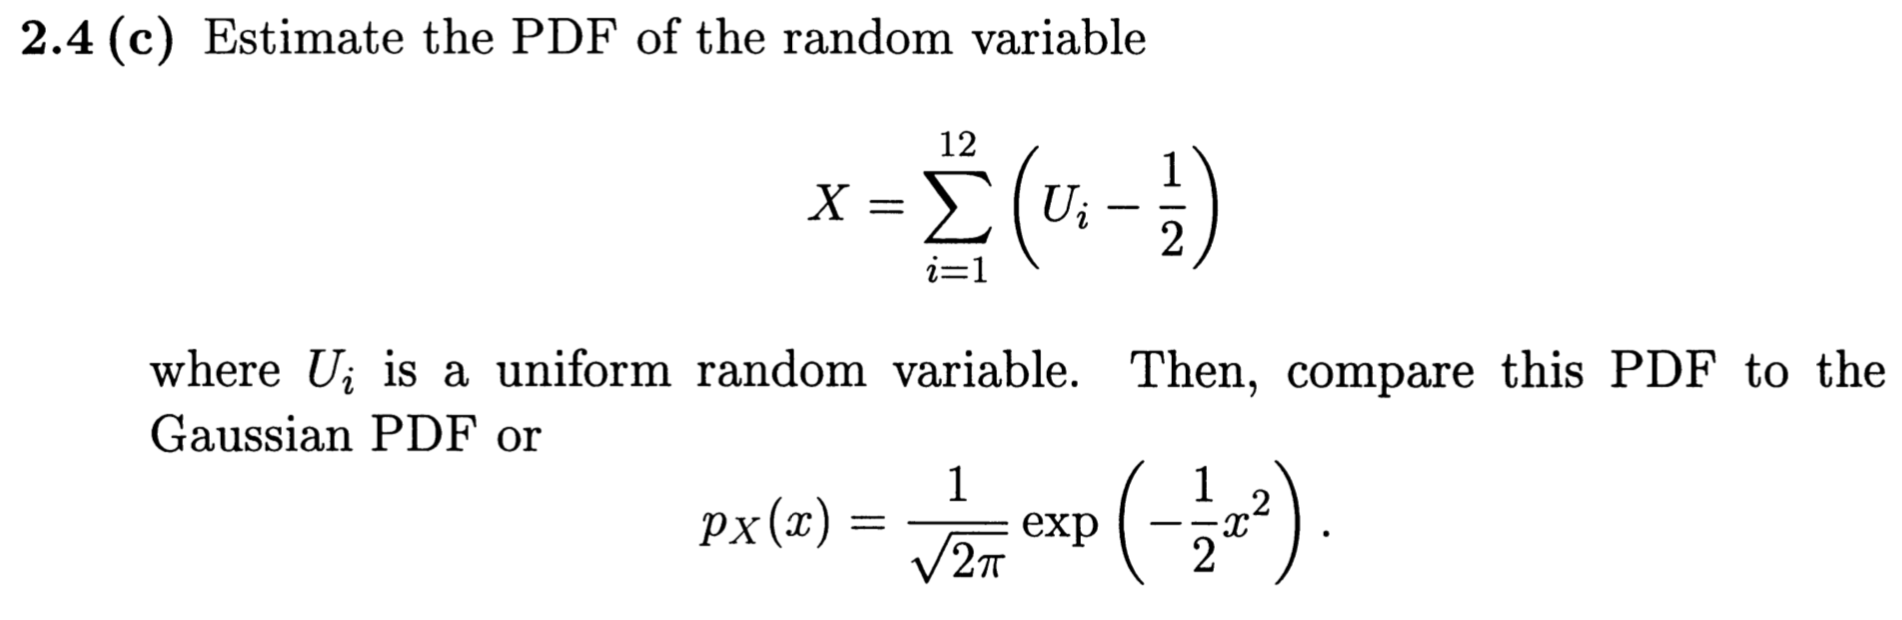

Answer: We know that adding multiple random variable will result in Gaussian distribution - Central Limit Theorem.
We are adding random variables shifted back by their mean and adding them up result in normal gaussian distribution

<IPython.core.display.Javascript object>


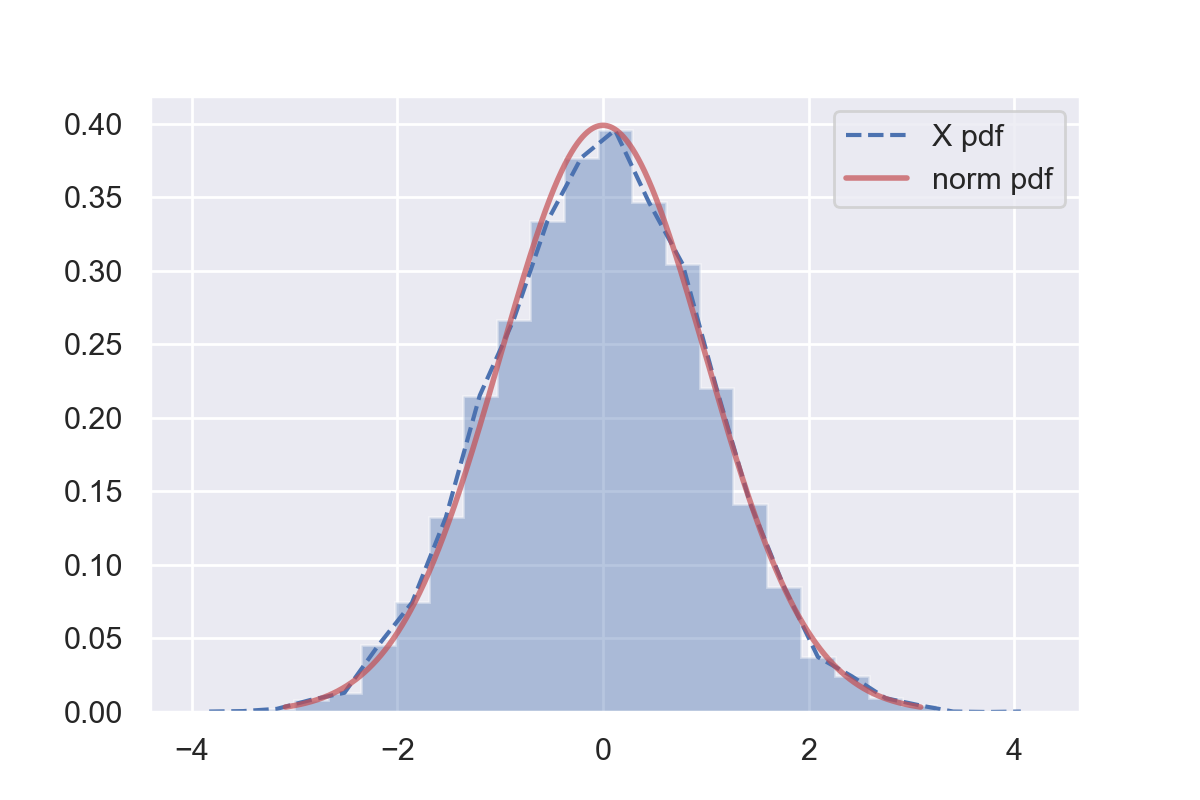

In [56]:
from scipy.stats import norm

'''
we are drawing histogram with density = True, so the curve is automatically a pdf

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html

densitybool, optional

    If True, the first element of the return tuple will be the counts normalized to form a probability density,
    i.e., the area (or integral) under the histogram will sum to 1. This is achieved by dividing the count by
    the number of observations times the bin width and not dividing by the total number of observations.
    If stacked is also True, the sum of the histograms is normalized to 1.
    
    Default is False.
'''

def draw_hist_with_curve(ax, x, color='b', bins=25, label=''):
    h = ax.hist(x, density=True, bins=bins, color=color, histtype='stepfilled', alpha=0.4)
    mean_of_intervals = [(h[1][i]+h[1][i+1])/2 for i in range(len(h[1])-1)]
    values_of_intervals = h[0]
    ax.plot(mean_of_intervals, values_of_intervals, color+'--', label=label + ' pdf')


M = 10000
X = np.sum(np.random.random_sample((M, 12)) - 0.5, axis=1) 

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(6, 4))
draw_hist_with_curve(ax, X, label='X')

y = np.linspace(norm.ppf(0.001), norm.ppf(0.999), M)
ax.plot(y, norm.pdf(y), 'r-', lw=2, alpha=0.7, label='norm pdf')
ax.legend()

#### 2.5 Estimate the PDF of X = U1 - U2, where U1 and U2 are uniform random variables. What is the most probable range of values?

Answer: 

<IPython.core.display.Javascript object>


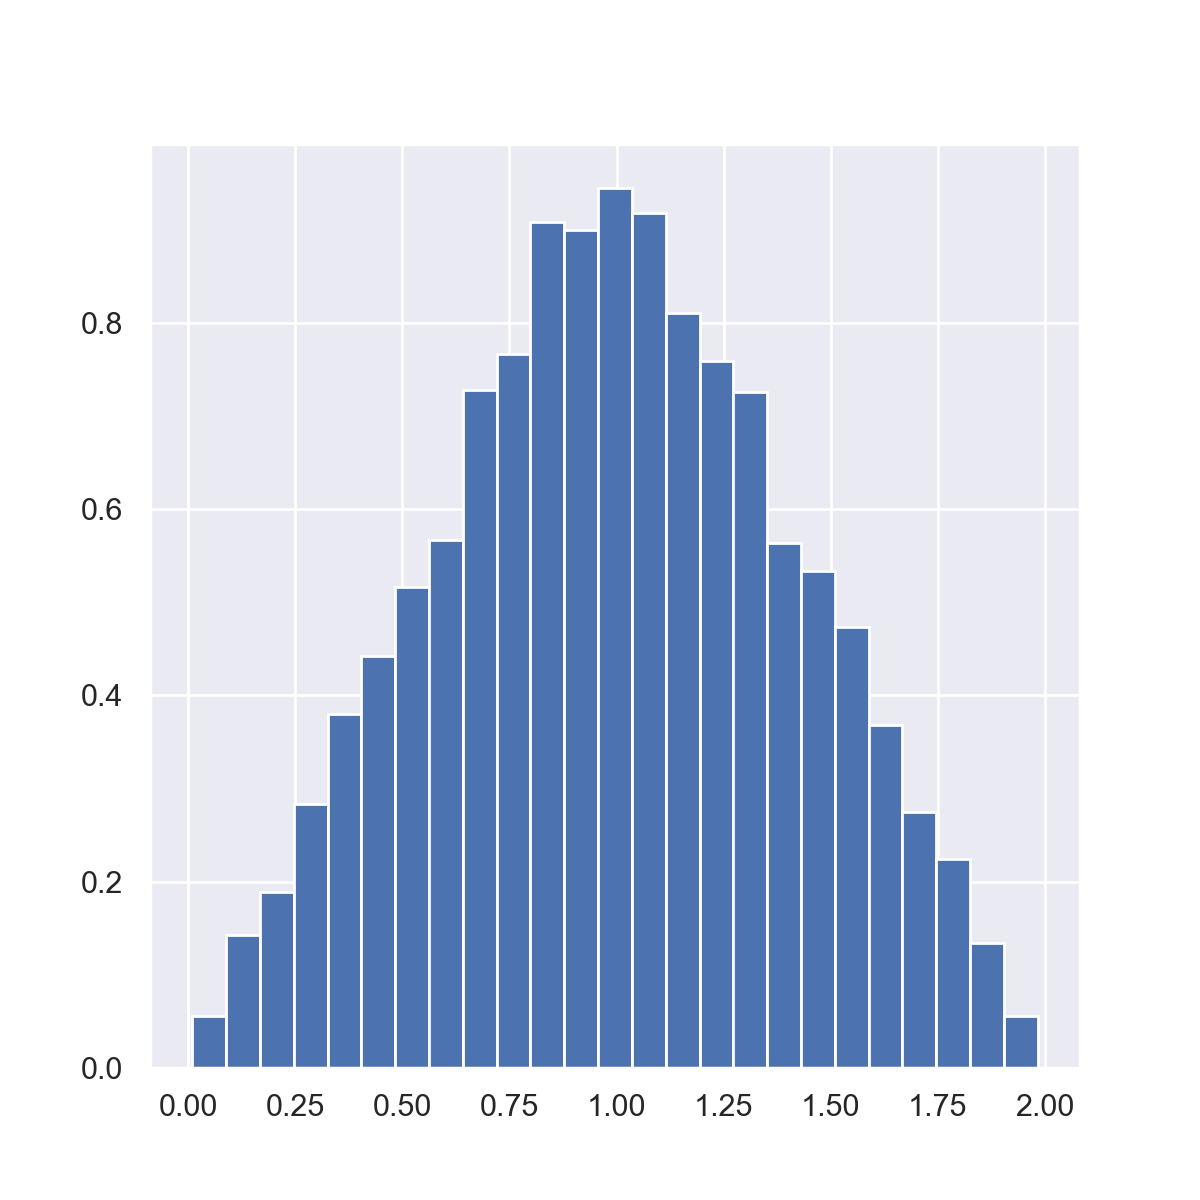

In [98]:
M = 10000
k = 2

X1 = np.random.random_sample((M,))

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(6, 6))
h = ax.hist(X, density=True, bins=25)